In [30]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [85]:
# Loading the train data
df = pd.read_csv('./data.csv')
            
# Looking top 10 rows
df.head(10)

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,Indra Kumar Sahu,ABHANPUR,BJP,0,1 Crore+,NaN,CHHATTISGARH,Graduate
1,1,Domanlal Korsewada,AHIWARA (SC),BJP,0,1 Crore+,9 Lac+,CHHATTISGARH,Post Graduate
2,2,Raghavendra Kumar Singh,AKALTARA,INC,0,14 Crore+,61 Lac+,CHHATTISGARH,Graduate Professional
3,3,Rajesh Agrawal,AMBIKAPUR,BJP,0,10 Crore+,2 Crore+,CHHATTISGARH,10th Pass
4,4,Vikram Usendi,ANTAGARH (ST),BJP,0,4 Crore+,NaN,CHHATTISGARH,10th Pass
5,5,Guru Khushwant Saheb,ARANG (SC),BJP,0,2 Crore+,1 Crore+,CHHATTISGARH,Post Graduate
6,6,Bhaiya Lal Rajwade,BAIKUNTHPUR,BJP,0,2 Crore+,6 Lac+,CHHATTISGARH,10th Pass
7,7,Tank Ram Verma,BALODA BAZAR,BJP,0,2 Crore+,NaN,CHHATTISGARH,Post Graduate
8,8,Sampat Agrawal,BASNA,BJP,0,11 Crore+,NaN,CHHATTISGARH,Post Graduate
9,9,Lakheshwar Baghel,BASTAR (ST),INC,0,0,87 Lac+,CHHATTISGARH,Graduate


In [86]:
# Looking the bigger picture
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              4095 non-null   int64 
 1   Candidate       4095 non-null   object
 2   Constituency ∇  4095 non-null   object
 3   Party           4095 non-null   object
 4   Criminal Case   4095 non-null   int64 
 5   Total Assets    4095 non-null   object
 6   Liabilities     3099 non-null   object
 7   state           4095 non-null   object
 8   Education       4095 non-null   object
dtypes: int64(2), object(7)
memory usage: 288.1+ KB


In [87]:
df.isnull().sum()

ID                  0
Candidate           0
Constituency ∇      0
Party               0
Criminal Case       0
Total Assets        0
Liabilities       996
state               0
Education           0
dtype: int64

In [88]:
print('The count of each category\n',df.Party.value_counts())

The count of each category
 Party
BJP                                    1471
INC                                     647
AITC                                    219
AAP                                     161
YSRCP                                   150
                                       ... 
Rashtriya Samaj Paksha                    1
MNS                                       1
Peasants And Workers Party of India       1
Swabhimani Paksha                         1
AIFB                                      1
Name: count, Length: 95, dtype: int64


In [89]:
print('The count of each category\n',df.Education.value_counts())

The count of each category
 Education
Graduate                 1017
Post Graduate             824
12th Pass                 680
Graduate Professional     660
10th Pass                 453
8th Pass                  169
Doctorate                 126
Others                     76
Literate                   42
5th Pass                   42
Illiterate                  5
Not Given                   1
Name: count, dtype: int64


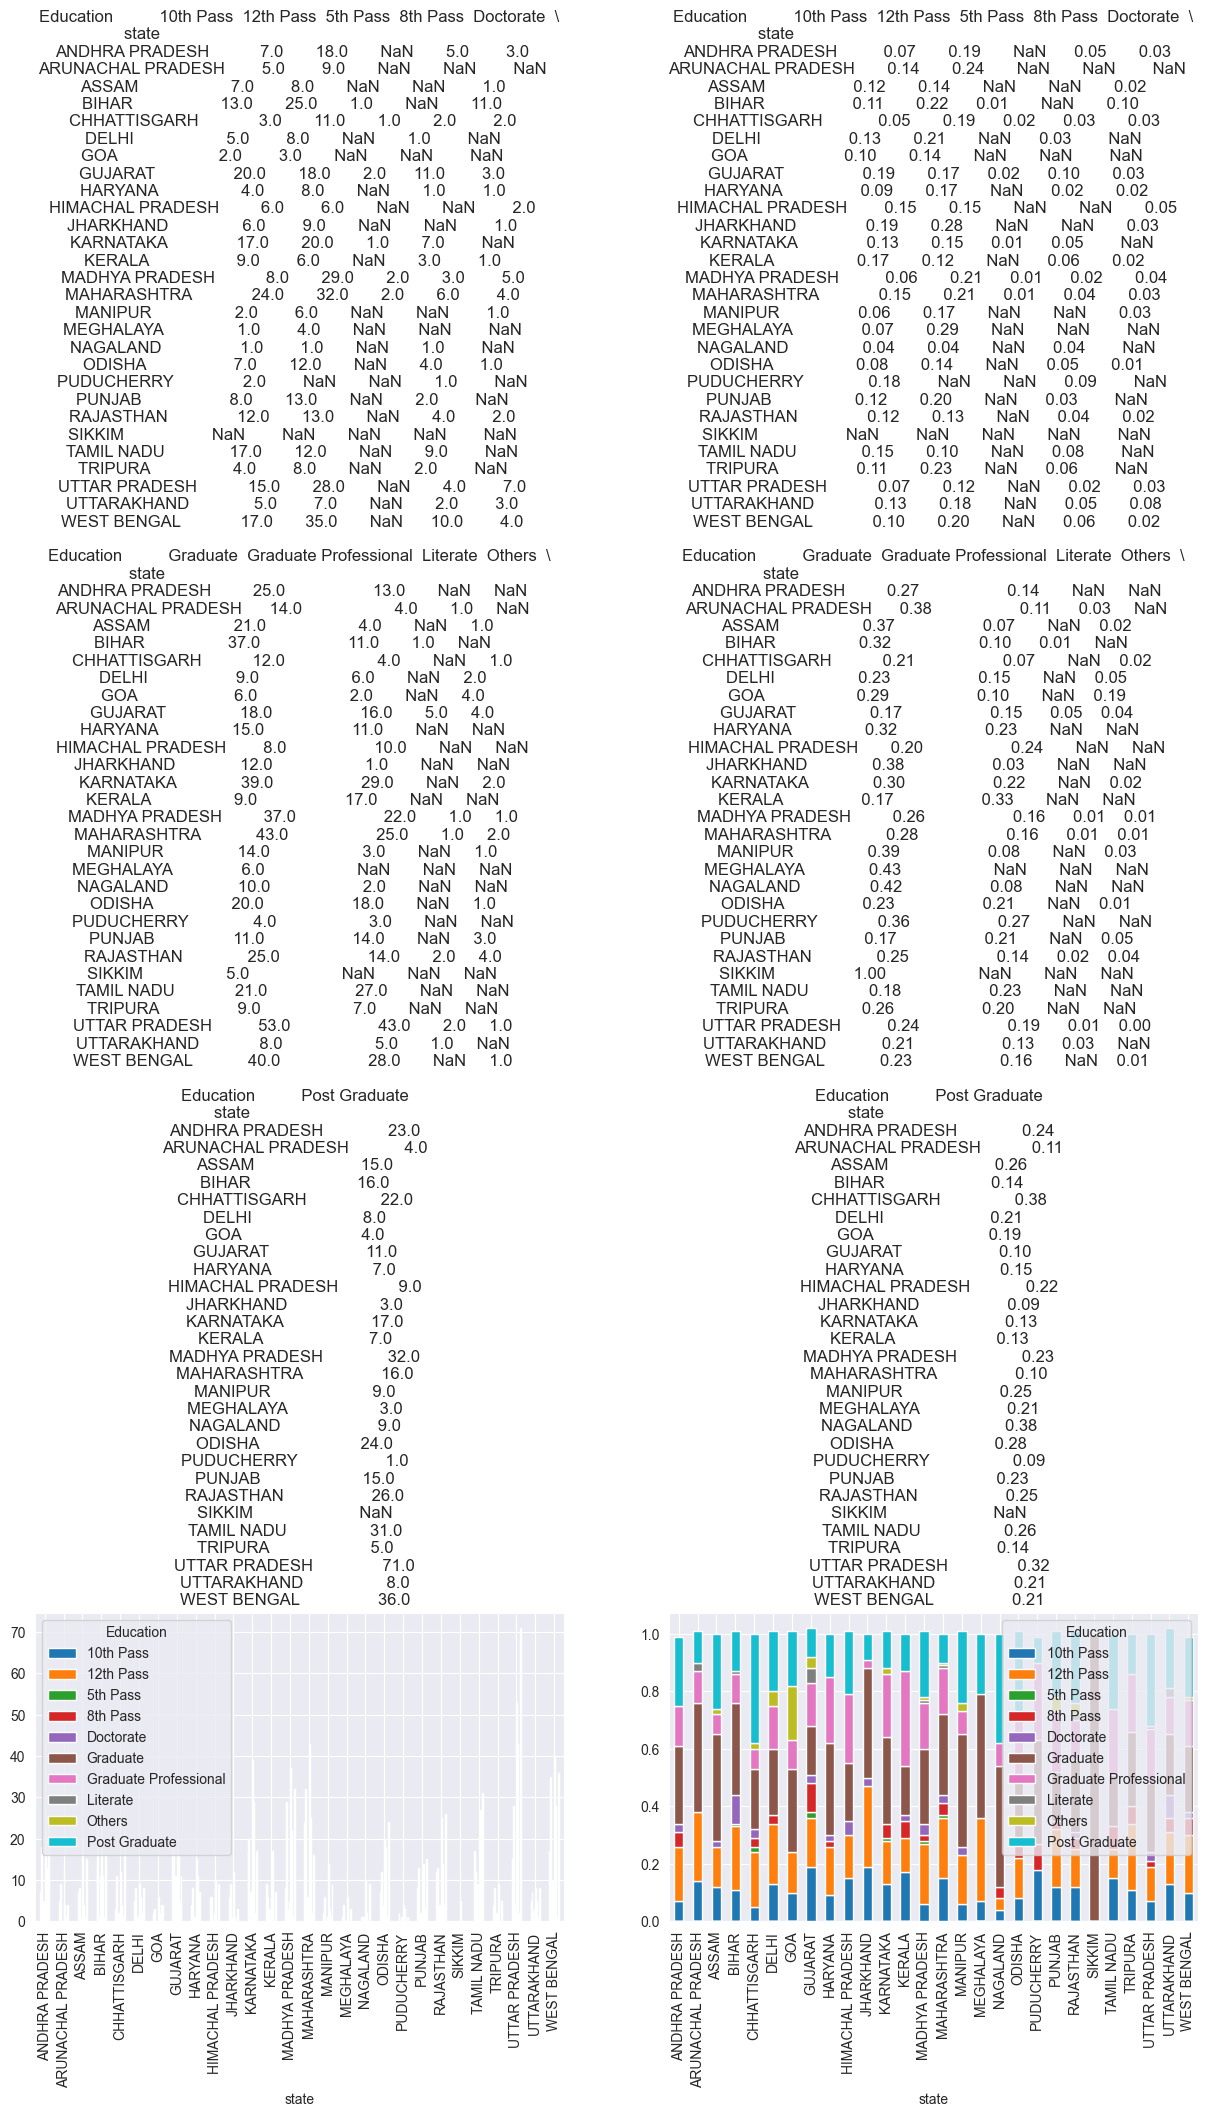

In [36]:
# Counting Var_1 in each segment
ax1 = df.groupby(["state"])["Education"].value_counts().unstack().round(3)

# Percentage of category of Var_1 in each segment
ax2 = df.pivot_table(columns='Education',index='state',values='ID',aggfunc='count')
ax2 = ax2.div(ax2.sum(axis=1), axis = 0).round(2)

#count plot
fig, ax = plt.subplots(1,2)
ax1.plot(kind="bar",ax = ax[0],figsize = (15,4))
ax[0].set_title(str(ax1))

#stacked bars
ax2.plot(kind="bar",stacked = True,ax = ax[1],figsize = (15,4))
ax[1].set_title(str(ax2))
plt.show()

In [37]:
df.ID.nunique()

2059

In [38]:
df.describe(include='all')

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
count,2059.000000,2059,2059,2059,2059.000000,2059,2059,2059,2059
unique,NaN,2039,2037,23,NaN,210,170,28,10
top,NaN,Rajendra Kumar,SAGAR,BJP,NaN,1 Crore+,0,UTTAR PRADESH,Graduate
freq,NaN,3,3,862,NaN,274,496,224,531
mean,1029.000000,NaN,NaN,NaN,1.777562,NaN,NaN,NaN,NaN
std,594.526422,NaN,NaN,NaN,4.762183,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,514.500000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,1029.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,1543.500000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


In [39]:
df = df[['ID','Candidate', 'Constituency ∇', 'Party', 'Criminal Case', 'Total Assets', 'Liabilities', 'state', 'Education']]
df.head(10)

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass
5,5,Arup Roy,HOWRAH MADHYA,AITC,0,3 Crore+,29 Lac+,WEST BENGAL,Graduate Professional
6,6,Baby Rani Maurya,AGRA RURAL (SC),BJP,0,2 Crore+,0,UTTAR PRADESH,Post Graduate
7,7,Neena Mittal,RAJPURA,AAP,1,9 Crore+,2 Crore+,PUNJAB,Graduate
8,8,Fareed Mahfooz Kidwai,RAM NAGAR,SP,1,5 Crore+,35 Lac+,UTTAR PRADESH,Post Graduate
9,9,Atul Moreshwar Save,AURANGBAD (EAST),BJP,6,22 Crore+,2 Crore+,MAHARASHTRA,Graduate


In [40]:
X = df
y = df['Education']

In [41]:
X = X.drop('Candidate',axis=1)
X = X.drop('Constituency ∇',axis=1)
X.drop('ID',axis=1,inplace=True)
for row in X.index:
    #Remove WhiteSpaces in State in the middle of the string.
    X.loc[row, "state"] = X.loc[row, "state"].replace(" ", "")
    # print(X.loc[row, "Total Assets"][-4:])
    if(X.loc[row, "Total Assets"][-4:] == "Lac+"):
        X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-4]
        X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 100)
    elif(X.loc[row, "Total Assets"][-6:] == "Crore+"):
        X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-6]
        X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 10000)
    elif(X.loc[row,  "Total Assets"][-5:] == "Thou+"):
        X.loc[row,  "Total Assets"] = X.loc[row,  "Total Assets"][:-5]
        X.loc[row,  "Total Assets"] = str(int(X.loc[row,  "Total Assets"]))
    elif(X.loc[row,  "Total Assets"][-5:] == "Hund+"):
        X.loc[row,  "Total Assets"] = "0"
for row in X.index:
    if(isinstance(X.loc[row, "Liabilities"], float)):
        X.loc[row, "Liabilities"] = "0"
    elif(X.loc[row, "Liabilities"][-4:] == "Lac+"):
        X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-4]
        X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 100)
    elif(X.loc[row, "Liabilities"][-6:] == "Crore+"):
        X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-6]
        X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 10000)
    elif(X.loc[row, "Liabilities"][-5:] == "Thou+"):
        X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-5]
        X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]))
    elif(X.loc[row, "Liabilities"][-5:] == "Hund+"):
        X.loc[row, "Liabilities"] = "0"
# Mapping Parties to unique values in the dataframe using map function
# Create a dictionary of the parties and their corresponding unique values
party = X['Party'].unique()
party = {value: idx for idx, value in enumerate(party)}
# Add a value for nan parties
party[""] = -1
# Mapping the values to the dataframe
X['Party'] = X['Party'].map(party)
state = X['state'].unique()
state = {value: idx for idx, value in enumerate(state)}
# Mapping the values to the dataframe
X['state'] = X['state'].map(state)
education = y.unique()
education = {value: idx for idx, value in enumerate(education)}
# Mapping the values to the dataframe
y = y.map(education)
X['Education'] = y

In [42]:
X

,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,4,2110000,20000,0,0
1,1,0,10000,0,1,1
2,2,0,70000,2200,2,2
3,1,0,90000,2400,3,2
4,1,2,20000,6100,4,0
...,...,...,...,...,...,...
2054,17,1,6100,1000,11,3
2055,2,0,20000,800,16,5
2056,1,0,130000,8500,5,4
2057,14,1,250000,9400,7,1


In [43]:
# Synthetic Data
df = pd.read_csv('./synthetic_data.csv')
X_Synthetic = df
X_Synthetic['state'] = X_Synthetic['state'].map(state)
X_Synthetic['Party'] = X_Synthetic['Party'].map(party)
X_Synthetic['Education'] = X_Synthetic['Education'].map(education)
X_Synthetic

,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,7,0,0,1600,20,2
1,11,1,60000,400,22,7
2,17,0,0,2000,4,4
3,11,6,20000,300000,16,2
4,1,0,270000,3200,9,4
...,...,...,...,...,...,...
7995,2,3,2300,5000,0,3
7996,13,0,0,1200,16,4
7997,4,0,90000,20000,4,4
7998,2,2,20000,8900,23,2


In [44]:
# Append the synthetic data to the original data
df_combined = pd.concat([X, X_Synthetic], ignore_index=True)

In [45]:
X = df_combined

In [46]:
X_Train_StateWise = []
Y_Train_StateWise = []
for i in range(len(state)):
	X_Train_StateWise.append(X[X['state'] == i].drop('Education', axis = 1))
	Y_Train_StateWise.append(X[X['state'] == i]['Education'])


In [47]:
Y = X['Education']
X = X.drop('Education', axis = 1)

In [48]:
train_dt1_x = X.copy()
train_dt1_y = Y.copy()
train_dt1_y.head()


0    0
1    1
2    2
3    2
4    0
Name: Education, dtype: int64

In [49]:
from sklearn.tree import DecisionTreeClassifier

# creating the decision tree function
model_dt1 = DecisionTreeClassifier(random_state=10,criterion='entropy')

#fitting the model
model_dt1.fit(train_dt1_x, train_dt1_y)

# depth of the decision tree
print('Depth of the Decision Tree: ', model_dt1.get_depth())

#checking the training score
print('Accuracy on training: ',model_dt1.score(train_dt1_x, train_dt1_y))

# predict the target on the train dataset
yhat1 = model_dt1.predict(train_dt1_x)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(train_dt1_y.values, yhat1, labels=[0,1,2,3,4,5,6,7,8,9])
print('-------The confusion matrix for this model is-------')
print(cm1)

from sklearn.metrics import classification_report
print('\n\n-------Printing the whole report of the model-------')
print(classification_report(train_dt1_y.values, yhat1))

Depth of the Decision Tree:  32
Accuracy on training:  0.9805149617258176
-------The confusion matrix for this model is-------
[[ 432    0    1    0    1    0    0    0    0    0]
 [   3 1655    1    2    4    0    0    0    0    0]
 [   2   17 2001    1    3    1    0    0    0    0]
 [   1   15   12 1550    3    0    0    0    0    0]
 [   3   18   24   11 2380    1    0    0    0    0]
 [   4    4   14    9   11 1134    0    0    0    0]
 [   0    2    2    0    1    0  223    0    0    0]
 [   1    0    4    6    5    3    0  278    0    0]
 [   1    0    0    0    2    1    0    0  102    0]
 [   0    1    0    0    0    0    0    0    1  108]]


-------Printing the whole report of the model-------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       434
           1       0.97      0.99      0.98      1665
           2       0.97      0.99      0.98      2025
           3       0.98      0.98      0.98      1581
           4    

In [50]:
X1 = train_dt1_x.copy()
y1 = pd.DataFrame({'Seg':train_dt1_y})

In [51]:
# # Implementing grid search

# # Get a range for max_depth
# max_depth = []
# max_features = []
# for i in range(20, 30):
#     max_depth.append(i)
# for i in range(0,10):
#     max_features.append(i/10)


# # Create the parameter grid
# parameter_grid = {
#     'max_depth' : max_depth,
#     'max_features': max_features
#     }

# from sklearn.model_selection import GridSearchCV
# gridsearch = GridSearchCV(estimator=model_dt1, param_grid=parameter_grid)

# gridsearch.fit(X1, y1)

# print('The best parameters are: ',gridsearch.best_params_)
# model_dt1 = DecisionTreeClassifier(max_depth=28, max_features=0.1 ,random_state=10, criterion='entropy')
# model_dt1.fit(train_dt1_x, train_dt1_y)
# print(model_dt1.score(train_dt1_x, train_dt1_y).round(4))


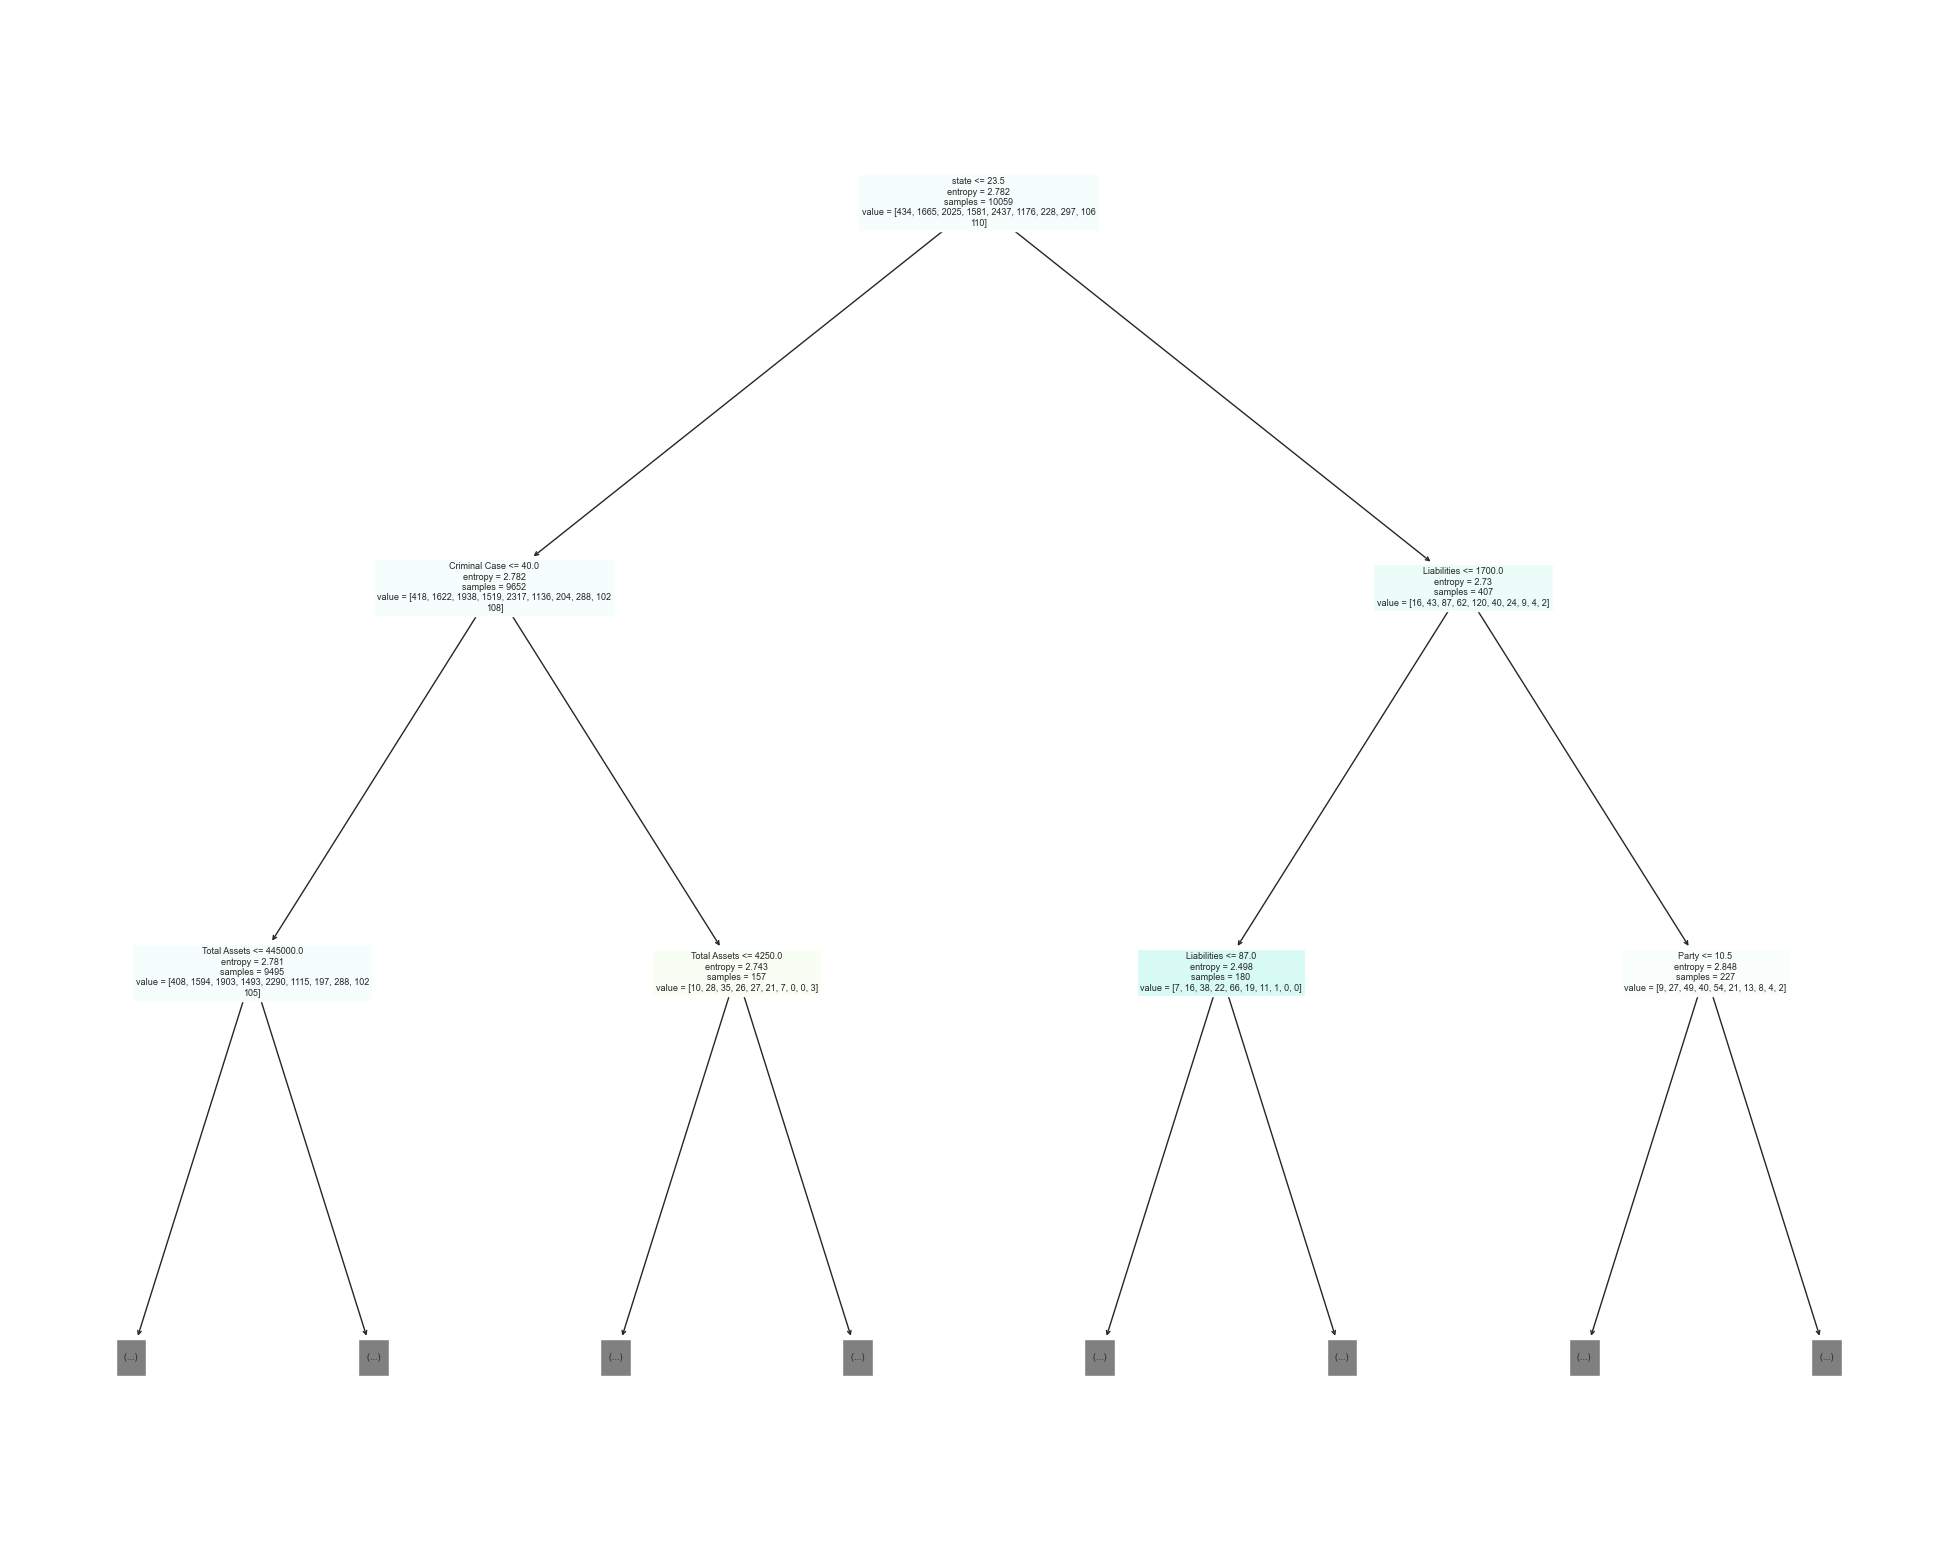

In [52]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt1, feature_names=train_dt1_x.columns, max_depth=2, filled=True)

In [53]:
def test_preprocessing(X, state, party):
	X = X.drop('Candidate',axis=1)
	X = X.drop('Constituency ∇',axis=1)
	X.drop('ID',axis=1,inplace=True)
	for row in X.index:
		X.loc[row, "state"] = X.loc[row, "state"].replace(" ", "")
		# print(X.loc[row, "Total Assets"][-4:])
		if(X.loc[row, "Total Assets"][-4:] == "Lac+"):
			X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-4]
			X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 100)
		elif(X.loc[row, "Total Assets"][-6:] == "Crore+"):
			X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-6]
			X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 10000)
		elif(X.loc[row,  "Total Assets"][-5:] == "Thou+"):
			X.loc[row,  "Total Assets"] = X.loc[row,  "Total Assets"][:-5]
			X.loc[row,  "Total Assets"] = str(int(X.loc[row,  "Total Assets"]))
		elif(X.loc[row,  "Total Assets"][-5:] == "Hund+"):
			X.loc[row,  "Total Assets"] = "0"
	for row in X.index:
		if(X.loc[row, "Liabilities"][-4:] == "Lac+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-4]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 100)
		elif(X.loc[row, "Liabilities"][-6:] == "Crore+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-6]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 10000)
		elif(X.loc[row, "Liabilities"][-5:] == "Thou+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-5]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]))
		elif(X.loc[row, "Liabilities"][-5:] == "Hund+"):
			X.loc[row, "Liabilities"] = "0"
	X['Party'] = X['Party'].map(party)
	X['state'] = X['state'].map(state)
	return X

In [54]:
def answer_preprocessing(X, state, party, education):
	X = X.drop('Candidate',axis=1)
	X = X.drop('Constituency ∇',axis=1)
	X.drop('ID',axis=1,inplace=True)
	for row in X.index:
		X.loc[row, "state"] = X.loc[row, "state"].replace(" ", "")
		# print(X.loc[row, "Total Assets"][-4:])
		if(X.loc[row, "Total Assets"][-4:] == "Lac+"):
			X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-4]
			X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 100)
		elif(X.loc[row, "Total Assets"][-6:] == "Crore+"):
			X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-6]
			X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 10000)
		elif(X.loc[row,  "Total Assets"][-5:] == "Thou+"):
			X.loc[row,  "Total Assets"] = X.loc[row,  "Total Assets"][:-5]
			X.loc[row,  "Total Assets"] = str(int(X.loc[row,  "Total Assets"]))
		elif(X.loc[row,  "Total Assets"][-5:] == "Hund+"):
			X.loc[row,  "Total Assets"] = "0"
	for row in X.index:
		if(X.loc[row, "Liabilities"][-4:] == "Lac+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-4]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 100)
		elif(X.loc[row, "Liabilities"][-6:] == "Crore+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-6]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 10000)
		elif(X.loc[row, "Liabilities"][-5:] == "Thou+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-5]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]))
		elif(X.loc[row, "Liabilities"][-5:] == "Hund+"):
			X.loc[row, "Liabilities"] = "0"
	X['Party'] = X['Party'].map(party)
	X['state'] = X['state'].map(state)
	X['Education'] = X['Education'].map(education)
	return X

In [55]:
X_Test = test_preprocessing(pd.read_csv('./test.csv'), state, party)

In [56]:
test_dt1_x = X_Test.copy()
y_dt1 = model_dt1.predict(test_dt1_x)
y_dt1

array([7, 5, 2, ..., 5, 9, 4])

In [57]:
answer = pd.read_csv('./answers.csv')
print(len(answer))
print(len(X_Test))
answer['Education'] = answer['Education'].map(education)
correct_count = 0
for i in range(len(answer)):
    if(answer.loc[i, 'Education'] == y_dt1[i]):
        correct_count += 1

print(correct_count)



1374
1374
247


In [58]:
print('Accuracy: ', correct_count/len(answer) * 100)

#Calculat the F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(answer['Education'], y_dt1, average='weighted')
#Print the f1_score
print(f1)


Accuracy:  17.976710334788937
0.18282098693261606


In [59]:
answer = answer_preprocessing(pd.read_csv('./answers.csv'), state, party, education)

In [60]:
answer.isnull().sum()

Party            0
Criminal Case    0
Total Assets     0
Liabilities      0
state            0
Education        0
dtype: int64

In [61]:
for i in range(len(answer)):
    if(pd.notnull(answer.loc[i, 'Party'])):
        continue
    else :
        print(answer.loc[i])

In [62]:
X_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Party          1374 non-null   int64 
 1   Criminal Case  1374 non-null   int64 
 2   Total Assets   1374 non-null   object
 3   Liabilities    1374 non-null   object
 4   state          1374 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 53.8+ KB


In [63]:
X_Test_StateWise = []
answer_statewise = []
Y_Test_StateWise = []
for i in range(len(state)):
	answer_statewise.append(answer[answer['state'] == i])
	X_Test_StateWise.append(X_Test[X_Test['state'] == i])


In [64]:
global_correct_count = 0

In [65]:
def calculate_accuracy(Y_Test_StateWise, answer_statewise):
	#convert this to an array
    temp = np.array(answer_statewise['Education'])
    correct_count = 0
    for i in range(len(Y_Test_StateWise)):
        if(temp[i] == Y_Test_StateWise[i]):
            correct_count += 1
    return [correct_count/len(Y_Test_StateWise) * 100, correct_count]

In [66]:
# # Train a Model for Each State

# from sklearn.tree import DecisionTreeClassifier

# models = []
# for i in range(len(state)):
#     print(i)
#     model = DecisionTreeClassifier(random_state=2,criterion='gini')
#     model.fit(X_Train_StateWise[i], Y_Train_StateWise[i])

#     if(len(X_Test_StateWise[i]) < 15):
#         models.append(model)
#         y = models[i].predict(X_Test_StateWise[i])
#         Y_Test_StateWise.append(y)
#         continue
#     else:
#         # Get a range for max_depth
#         max_depth = []
#         max_features = []
#         for j in range(1, 60):
#             max_depth.append(j)
#             max_features.append((j)/60)


#         # Create the parameter grid
#         parameter_grid = {
#             'max_depth' : max_depth,
#             'max_features': max_features
#             }

#         from sklearn.model_selection import GridSearchCV
#         gridsearch = GridSearchCV(estimator=model, param_grid=parameter_grid)

#         gridsearch.fit(X_Train_StateWise[i], Y_Train_StateWise[i])

#         model = DecisionTreeClassifier(max_depth=gridsearch.best_params_['max_depth'], max_features=gridsearch.best_params_['max_features'] ,random_state=2)
#         model.fit(X_Train_StateWise[i], Y_Train_StateWise[i])
#         models.append(model)
#         y = models[i].predict(X_Test_StateWise[i])
#         Y_Test_StateWise.append(y)
#     print(calculate_accuracy(Y_Test_StateWise[i],answer_statewise[i]))


In [67]:
# for i in range(len(state)):
#     print(calculate_accuracy(Y_Test_StateWise[i],answer_statewise[i])[0])
#     global_correct_count += calculate_accuracy(Y_Test_StateWise[i],answer_statewise[i])[1]

In [68]:
# print('Accuracy: ', global_correct_count/len(answer) * 100)

In [69]:
# Y_Test_Final = []
# for i in range(len(state)):
#     for row in Y_Test_StateWise[i].index:
#         print(row)
#         print(Y_Test_StateWise[i].loc[row])
#         Y_Test_Final.append(Y_Test_StateWise[i].loc[row])

In [70]:
# Y_Test_Final = pd.DataFrame(Y_Test_Final)

In [71]:
# Y_Test_Final.sort_index(inplace=True)

In [72]:
# Y_Test_Final

In [73]:
# answer_statewise = []
# answer['state'] = answer['state'].map(state)
# for i in range(len(state)):
# 	answer_statewise.append(answer[answer['state'] == i]['Education'])


In [74]:
# answer_statewise[1]

In [75]:
# Y_Testt[1]

In [76]:
X_Test_StateWise[1]

,Party,Criminal Case,Total Assets,Liabilities,state
19,1,0,0,3200,1
21,1,1,10000,3100,1
37,1,0,20000,1900,1
45,1,0,110000,10000,1
65,1,0,20000,0,1
...,...,...,...,...,...
1278,2,0,170000,4300,1
1285,1,1,100000,10000,1
1295,1,1,60000,4600,1
1350,2,1,20000,9700,1


In [77]:
answer_statewise[1]

,Party,Criminal Case,Total Assets,Liabilities,state,Education
19,1,0,0,3200,1,2
21,1,1,10000,3100,1,2
37,1,0,20000,1900,1,2
45,1,0,110000,10000,1,1
65,1,0,20000,0,1,4
...,...,...,...,...,...,...
1278,2,0,170000,4300,1,3
1285,1,1,100000,10000,1,2
1295,1,1,60000,4600,1,2
1350,2,1,20000,9700,1,2


In [78]:
#Implement KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

models_KNN = []
Y_Test_StateWise = []

# Grid Search
for i in range(len(state)):
	param_grid = {
		'n_neighbors': np.arange(1, 15)
	}
	model = KNeighborsClassifier()
	if(len(X_Train_StateWise[i]) < 15):
		model.fit(X_Train_StateWise[i], Y_Train_StateWise[i])
		models_KNN.append(model)
		y = model.predict(X_Test_StateWise[i])
		Y_Test_StateWise.append(y)
		continue
	model = GridSearchCV(model, param_grid)
	model.fit(X_Train_StateWise[i], Y_Train_StateWise[i])
	model = model.best_estimator_
	model.fit(X_Train_StateWise[i], Y_Train_StateWise[i])
	models_KNN.append(model)
	y = model.predict(X_Test_StateWise[i])
	print(len(y))
	Y_Test_StateWise.append(y)
	models_KNN.append(model)

79
88
80
86


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


118
133
44


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


103
55


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


27
18


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


37
31


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


31
63


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


17
86


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


34
20


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


36
73


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


16
30


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


29
15


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


3
15
7


/Users/kushagra/miniconda3/envs/nlp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [79]:
# Implementing Random Forest
# Importing the library
from sklearn.ensemble import RandomForestClassifier
models_RF = []
Y_Test_StateWise = []

# Grid Search
for i in range(len(state)):
	model = RandomForestClassifier(random_state=2,n_estimators=20)
	model.fit(X_Train_StateWise[i], Y_Train_StateWise[i])
	models_RF.append(model)
	y = model.predict(X_Test_StateWise[i])
	print(len(y))
	Y_Test_StateWise.append(y)

79
88
80
86
118
133
44
103
55
27
18
37
31
31
63
17
86
34
20
36
73
16
30
29
15
3
15
7


In [80]:
i = 0
global_correct_count = 0
for i in range(len(state)):
    print(calculate_accuracy(Y_Test_StateWise[i],answer_statewise[i])[0])
    global_correct_count += calculate_accuracy(Y_Test_StateWise[i],answer_statewise[i])[1]

24.050632911392405
22.727272727272727
15.0
26.744186046511626
17.796610169491526
23.308270676691727
11.363636363636363
21.35922330097087
25.454545454545453
25.925925925925924
22.22222222222222
27.027027027027028
19.35483870967742
16.129032258064516
15.873015873015872
29.411764705882355
20.930232558139537
32.35294117647059
30.0
19.444444444444446
9.58904109589041
25.0
20.0
20.689655172413794
33.33333333333333
100.0
13.333333333333334
28.57142857142857


In [81]:
print('Accuracy: ', global_correct_count/len(answer) * 100)

Accuracy:  21.17903930131004


In [82]:
Y_Final = []
for i in range(len(state)):
	Y_Final.append(X_Test[X_Test['state'] == i])


for i in range(len(state)):
	Y_Final[i]['Education'] = Y_Test_StateWise[i]

reverse_education = {value: key for key, value in education.items()}

answer_csv_to_write = []
for i in range(len(state)):
    for index, value in Y_Final[i]['Education'].items():
        answer_csv_to_write.append([index,reverse_education[value]])
answer_csv_to_write.sort()
yrt = []
for i in range(len(answer_csv_to_write)):
    yrt.append(education[answer_csv_to_write[i][1]])
f1 = f1_score(answer['Education'], yrt, average='weighted')
print(f1)


0.20731314834675363


/var/folders/dq/bh64zxfx1nn4xlf98w20zj0h0000gn/T/ipykernel_37364/2357261873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_Final[i]['Education'] = Y_Test_StateWise[i]
/var/folders/dq/bh64zxfx1nn4xlf98w20zj0h0000gn/T/ipykernel_37364/2357261873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_Final[i]['Education'] = Y_Test_StateWise[i]
/var/folders/dq/bh64zxfx1nn4xlf98w20zj0h0000gn/T/ipykernel_37364/2357261873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [83]:
print(f1)

0.20731314834675363


In [84]:
with open('answer_knn.csv', 'w') as f:
    f.write('ID,Education\n')
    for item in answer_csv_to_write:
        f.write(f"{item[0]},{item[1]}\n")